In [1]:
!pip install graphviz

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [4]:
df = pd.read_excel('telecom.xlsx')
df = pd.get_dummies(df, columns = ['Technology'])
df_x = df.iloc[:, [0, 1, 2, 4, 5, 6, 7]]
df_y = df['Leave']

,Age,CenterCalls,AverageBill,Technology_2G,Technology_3G,Technology_4G,Technology_5G
0,46,0,88,0,1,0,0
1,47,1,80,0,0,1,0
2,43,1,64,0,1,0,0
3,37,2,105,1,0,0,0
4,10,0,44,0,1,0,0
...,...,...,...,...,...,...,...
3995,74,0,48,0,0,1,0
3996,69,0,84,0,0,1,0
3997,10,4,46,1,0,0,0
3998,70,1,70,0,0,1,0


In [5]:
tree_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf = 5)
tree_model.fit(df_x, df_y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)

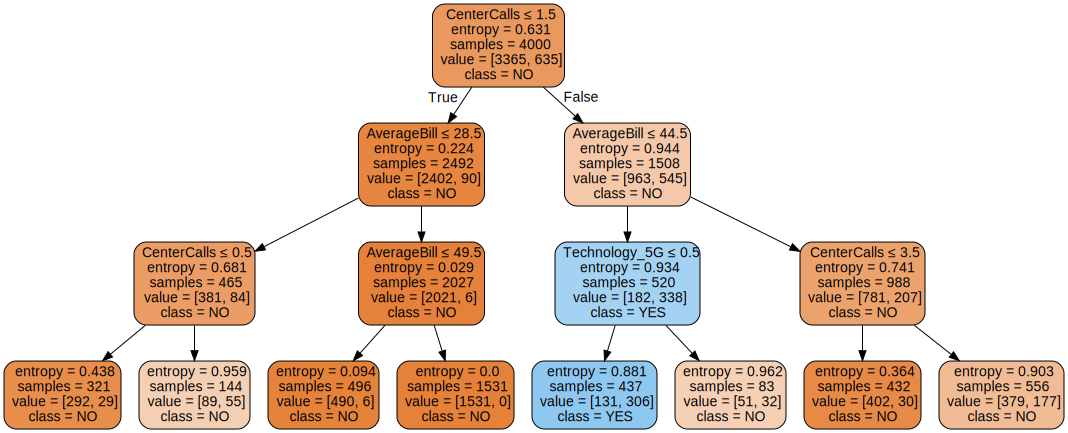

In [7]:
dot_data = export_graphviz(tree_model, out_file = None, feature_names = df_x.columns, class_names = tree_model.classes_, filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
graph
#value 는 Leave 분류

In [8]:
df_predict = pd.read_excel('telecom_new.xlsx')
df_predict = pd.get_dummies(df_predict, columns = ['Technology'])
tree_prediction = tree_model.predict(df_predict)
tree_prediction

array(['NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO'], dtype=object)